# Histogram metric

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('level3.csv')

In [5]:
# MOA map for labels
meta_map = pd.read_csv('repurposing_info_external_moa_map_resolved.tsv', sep='\t')
meta_map = meta_map[['broad_sample', 'moa']]
df = pd.merge(df, meta_map, how='left', left_on=['Metadata_broad_sample'], right_on=['broad_sample'])

In [6]:
def extract_feats(df):
    features_ = []
    for col in df.columns.tolist():
        if col.startswith('efficientnet_'):
            features_.append(col)
    return features_
features = extract_feats(df)
meta_features = []
for col in df.columns.tolist():
    if col.startswith('Metadata_'):
        meta_features.append(col)

In [7]:
mad_dmso = normalize(
    profiles=df,
    features=features,
    samples="Metadata_broad_sample == 'DMSO'",
    method='mad_robustize',
    output_file='none'
)

In [22]:
con_mad = aggregate(
    mad_dmso,
    strata=["Metadata_broad_sample"],
    features=features
)
con_mad = pd.merge(con_mad, meta_map, how='left', left_on=['Metadata_broad_sample'], right_on=['broad_sample'])

In [8]:
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import ploting

In [23]:
hits = ploting.first_hit(con_mad, features)

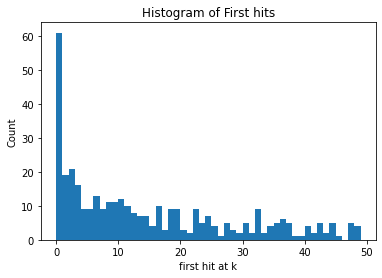

In [24]:
bins = np.arange(0,50,1)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hits, bins, density=False)
plt.xlabel('first hit at k')
plt.ylabel('Count')
plt.title('Histogram of First hits')
plt.show()

In [28]:
count = len([i for i in hits if i < 50])
count


367

In [29]:
rand_con = con_mad.copy()
ran_sample = rand_con.Metadata_broad_sample.sample(frac=1).reset_index(drop=True)
ran_moa = rand_con.moa.sample(frac=1).reset_index(drop=True)
old = rand_con.drop(columns=['Metadata_broad_sample','broad_sample', 'moa'])
rand_con = old.join(ran_sample).join(ran_moa)
rand_con.dropna(inplace=True)

In [30]:
rand_hits = ploting.first_hit(rand_con, features)

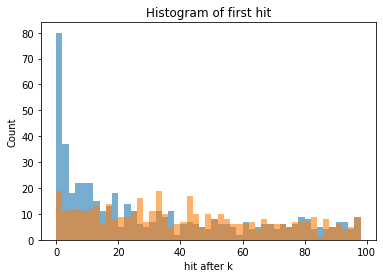

In [31]:
bins = np.arange(0,100,2)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hits, bins, alpha=0.6)
plt.hist(rand_hits, bins,alpha=0.6)
plt.xlabel('hit after k')
plt.ylabel('Count')
plt.title('Histogram of first hit')
plt.show()

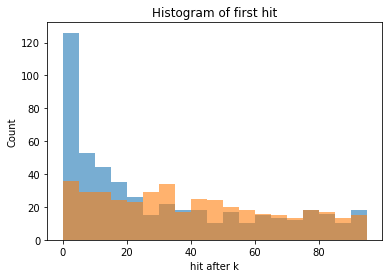

In [32]:
bins = np.arange(0,100,5)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hits, bins, alpha=0.6)
plt.hist(rand_hits, bins,alpha=0.6)
plt.xlabel('hit after k')
plt.ylabel('Count')
plt.title('Histogram of first hit')
plt.show()

In [18]:
sphere = normalize(
    profiles=df,
    features=features,
    samples="Metadata_broad_sample == 'DMSO'",
    method='spherize',
    output_file='none'
)
con = aggregate(
    sphere,
    strata=["Metadata_broad_sample"],
    features=features
)
con = pd.merge(con, meta_map, how='left', left_on=['Metadata_broad_sample'], right_on=['broad_sample'])



In [20]:
con.dropna(inplace=True)
sphere_hits = ploting.first_hit(con, features)

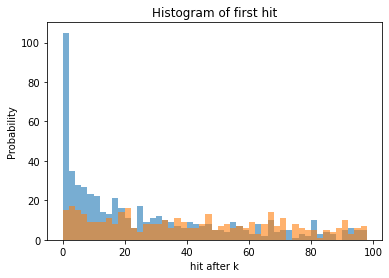

In [21]:
bins = np.arange(0,100,2)
plt.style.use({'figure.facecolor':'white'})
plt.hist(sphere_hits, bins, alpha=0.6)
plt.hist(rand_hits, bins,alpha=0.6)
plt.xlabel('hit after k')
plt.ylabel('Count')
plt.title('Histogram of first hit')
plt.show()

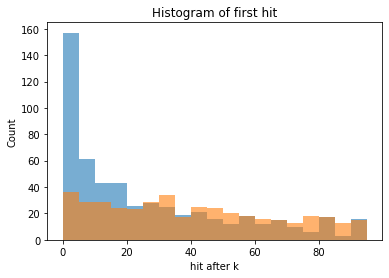

In [35]:
bins = np.arange(0,100,5)
plt.style.use({'figure.facecolor':'white'})
plt.hist(sphere_hits, bins, alpha=0.6)
plt.hist(rand_hits, bins,alpha=0.6)
plt.xlabel('hit after k')
plt.ylabel('Count')
plt.title('Histogram of first hit')
plt.show()


In [34]:
count = len([i for i in sphere_hits if i < 50])
count

439